<a href="https://colab.research.google.com/github/ill11umi/data_app_market/blob/main/data_app_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Google Play Store apps and reviews

In [ ]:
#read_in_dataset

import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

#Drop_Duplicates
apps = apps_with_duplicates.drop_duplicates()

#Total_Number_Of_Apps
print('total number of apps in the dataset = ' ,  len(apps))

#info
apps.info()
apps.describe()

# Have a look at a random sample of 5 rows
apps.sample(n =5)


total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7829,8948,DV Lottery Photo,VIDEO_PLAYERS,2.9,23,4.0M,"5,000+",Free,0,Everyone,Video Players & Editors,"December 16, 2016",1.1,3.0 and up
5856,6889,Allsetra B.V.,BUSINESS,4.1,15,24M,"1,000+",Free,0,Everyone,Business,"April 5, 2018",3.1.2,4.3 and up
2149,2727,"Shopular: Coupons, Weekly Ads & Shopping Deals",SHOPPING,4.7,57920,NaN,"1,000,000+",Free,0,Everyone,Shopping,"May 31, 2018",Varies with device,Varies with device
4991,5983,"Victoria, BC | Tour City",TRAVEL_AND_LOCAL,4.3,20,15M,"1,000+",Free,0,Everyone,Travel & Local,"August 2, 2016",1.7,4.0 and up
6086,7130,CB Mobile,BUSINESS,NaN,3,2.6M,100+,Free,0,Everyone,Business,"April 26, 2018",10,4.0 and up


<Figure size 720x432 with 0 Axes>

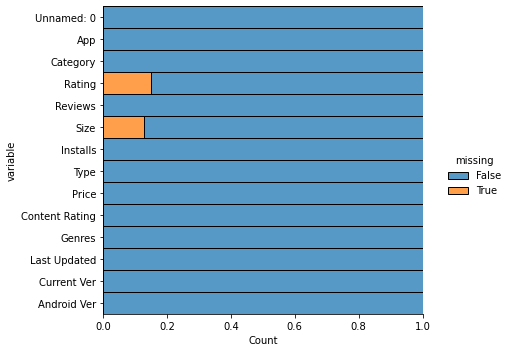

In [ ]:
#Visualizing missing data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.displot( data=apps.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


Cleaning Data



In [ ]:
# List of characters to remove
chars_to_remove = ['+', ',', '$' , 'M']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: str(x).replace(char, ''))

 # Convert col to numeric
apps[col] = pd.to_numeric(apps[col])



3. Correcting Data


In [ ]:
import numpy as np

# Convert Installs to float data type
apps['Intsalls'] = apps['Installs'].astype('float64')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float64')

# converting Size columns datatypes
apps['Size'] = apps[['Size']].astype('float64')

# converting Reviews columns datatypes
apps['Reviews'] = apps['Reviews'].astype('int64')



4.  Exploring app categories

Number of categories =  33


<Axes: xlabel='App', ylabel='Category'>

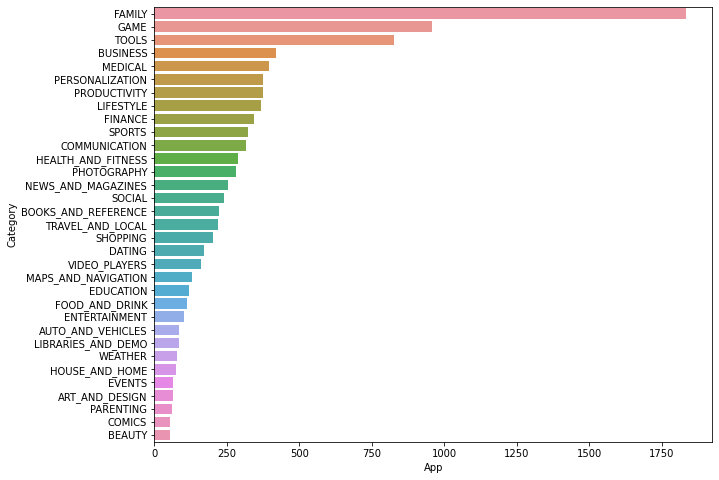

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'.
num_apps_in_category = apps.groupby('Category').agg({'App':'count'})

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(by='App', ascending=False)

# plotting
plt.figure(figsize=(10, 8))
sns.barplot(data = sorted_num_apps_in_category, x=sorted_num_apps_in_category['App'], y=sorted_num_apps_in_category.index)

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})






Average app rating =  4.173243045387994
